In [2]:
#backend matplotlib notebook para uso de eventos del mouse 
%matplotlib notebook

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import sys
from sklearn.cluster import KMeans

#Scripts para leer y procesar imagen
sys.path.insert(0, '../Golden Master (AS IS)')
import readImage
import preProcessing as pP
import sorts as srt
import perspective as pPe
import indAnalysis as inA
import writeImage2

Im happy...


In [4]:
#leer una imagen de prueba
batch = False
qr = '601170500100157'
qr_count = 1

<IPython.core.display.Javascript object>


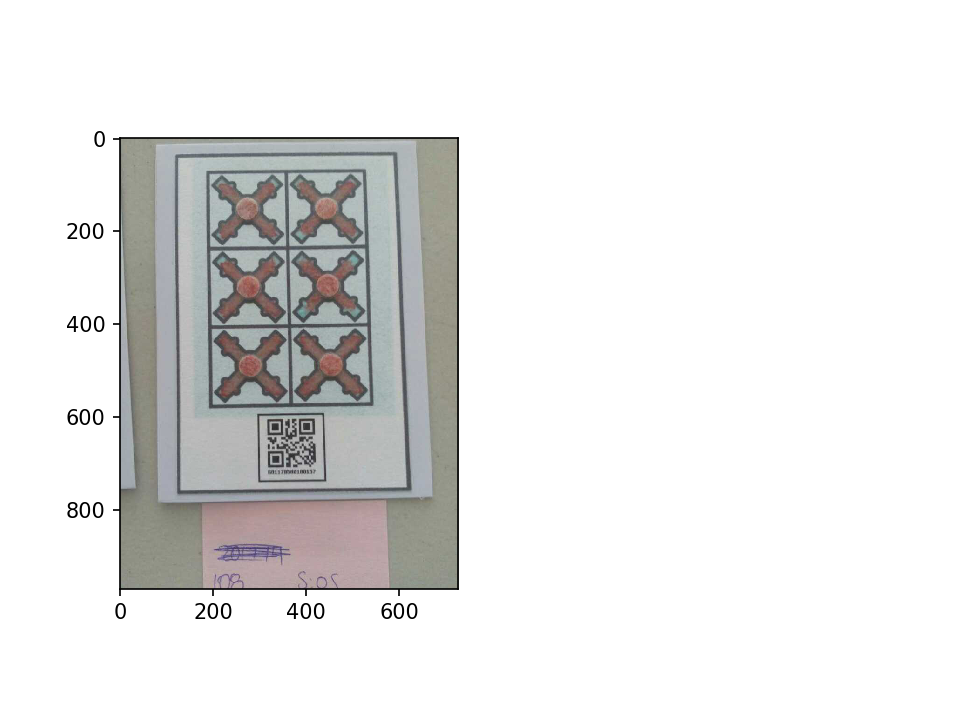

In [5]:
#Read from local file local = True, from db local = False, count = Test repeated
imgBGR = readImage.readImage(qr, local = False, count = qr_count)
if(isinstance(imgBGR, str)):
    print(imgBGR)
else: 
    # show the original image
    if (not batch):
     plt.subplot(121),plt.imshow(cv2.cvtColor(imgBGR,cv2.COLOR_BGR2RGB))
     plt.show()

In [6]:
# Convert to HSV
imgHSV = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2HSV)

In [11]:
# resize
img = imgBGR[::3, ::3]
img.shape

(324L, 243L, 3L)

In [12]:
#find clusters
n_colors = 16
model = KMeans(n_colors)
img_flat = img.reshape(-1,3) 
labels = model.fit_predict(img_flat)
centers = model.cluster_centers_

<IPython.core.display.Javascript object>


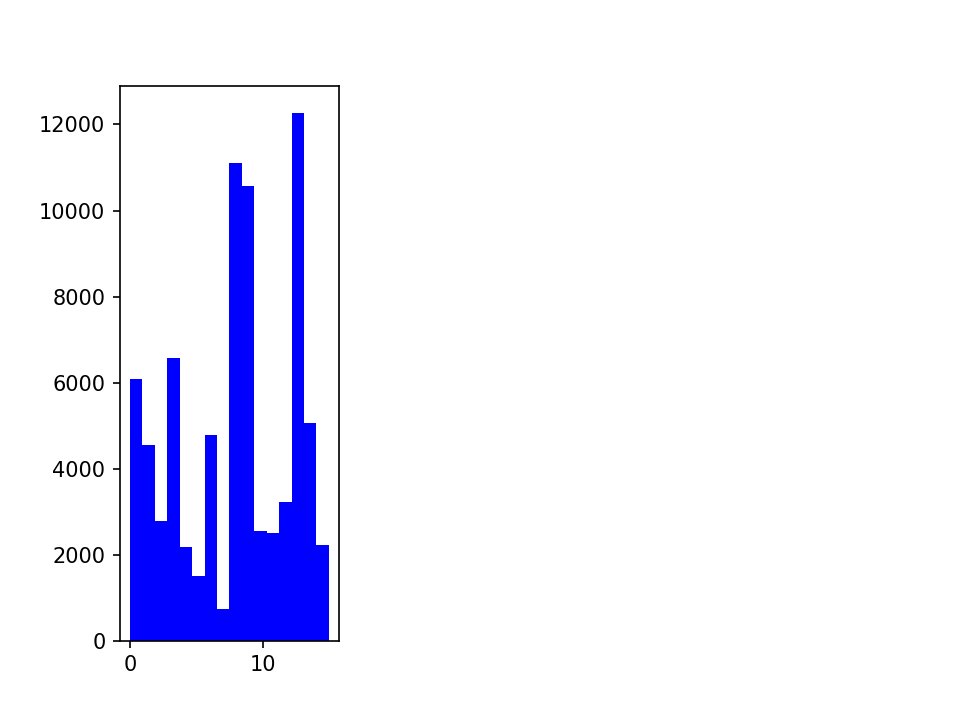

In [13]:
plt.clf()
plt.close()
plt.subplot(131),  
plt.hist(labels, bins = n_colors, color = ['blue'])  
plt.show()

<IPython.core.display.Javascript object>


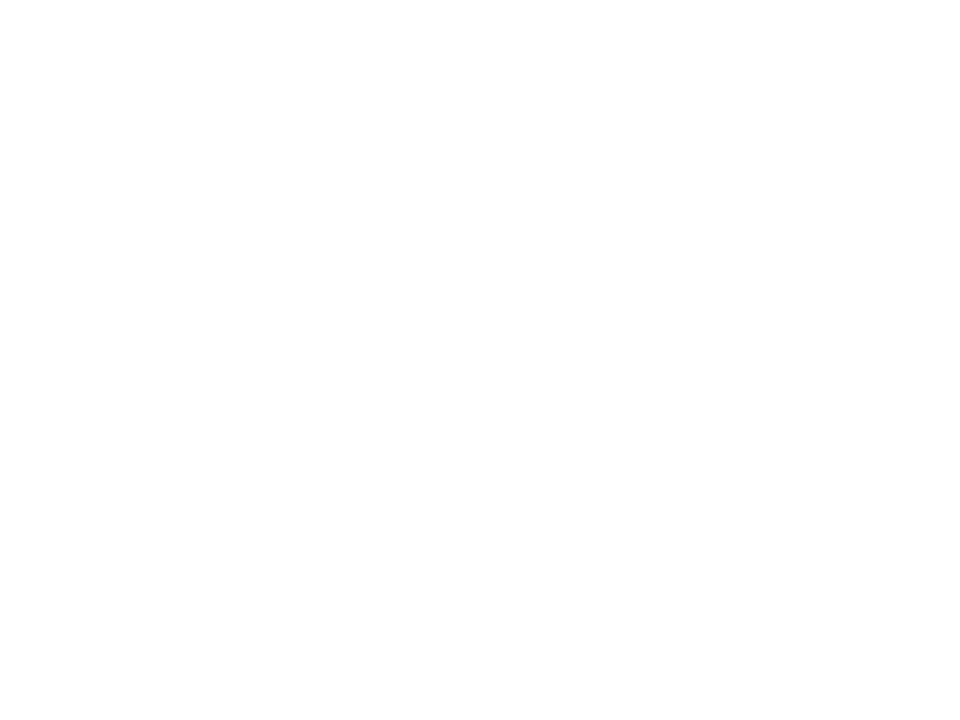

<IPython.core.display.Javascript object>


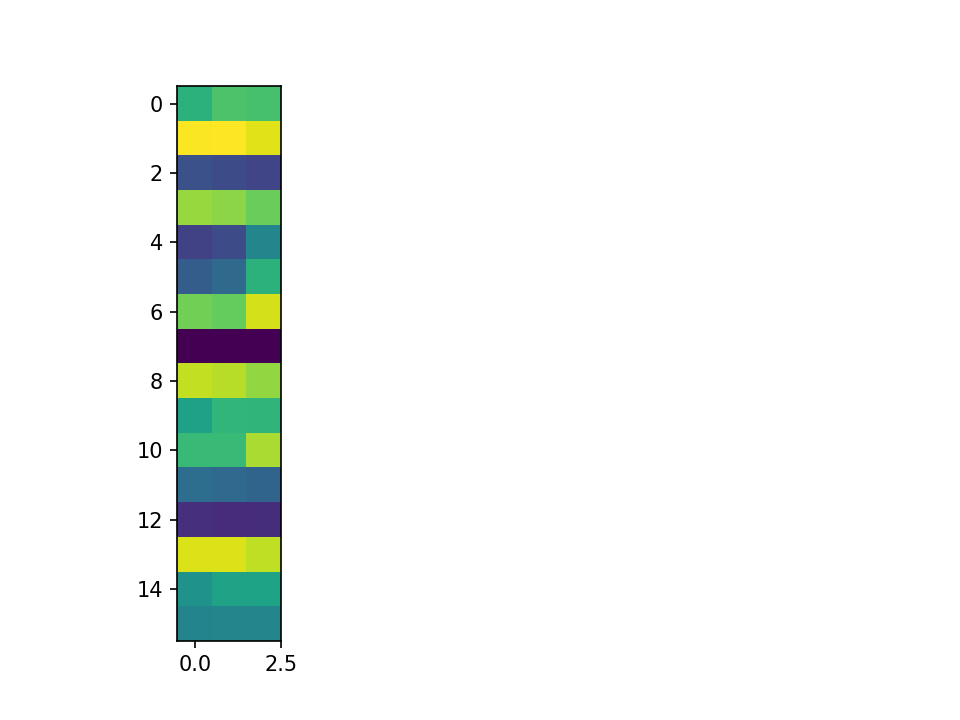

(<matplotlib.axes._subplots.AxesSubplot at 0xe8c0e48>,
 <matplotlib.image.AxesImage at 0xe8c07b8>)

In [16]:
plt.clf()
plt.close()
plt.subplot(131), plt.imshow(centers)